In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import sys
sys.path.append('../src')
from torch_utils import *

In [10]:
results_path = '../results/testing'
metrics_list = ['accuracy','f1','precision','recall','sensitivity','specificity']
max_epochs = 5
metrics_dict = read_train_history(results_path,metrics_list,max_epochs)

#plot metrics on validation data
plot_mean_std({metric:np.array(metrics_dict[metric]) for metric in metrics_list},'',fontsize=20,y_lim = 1.0)  

#plot loss on train and validation
plot_mean_std({metric:np.array(metrics_dict[metric]) for metric in ['loss_val','loss_train']},'',fontsize=20)  

#print mean and std of metrics on test data
for metric in metrics_list:
    mean,std = mean_std_metric(np.array(metrics_dict[f'{metric}_test']))
    print(f'{metric}: {mean:.3f} +- {std:.3f}')


FileNotFoundError: [Errno 2] No such file or directory: '../results/testing/split_2/training_info.pth'

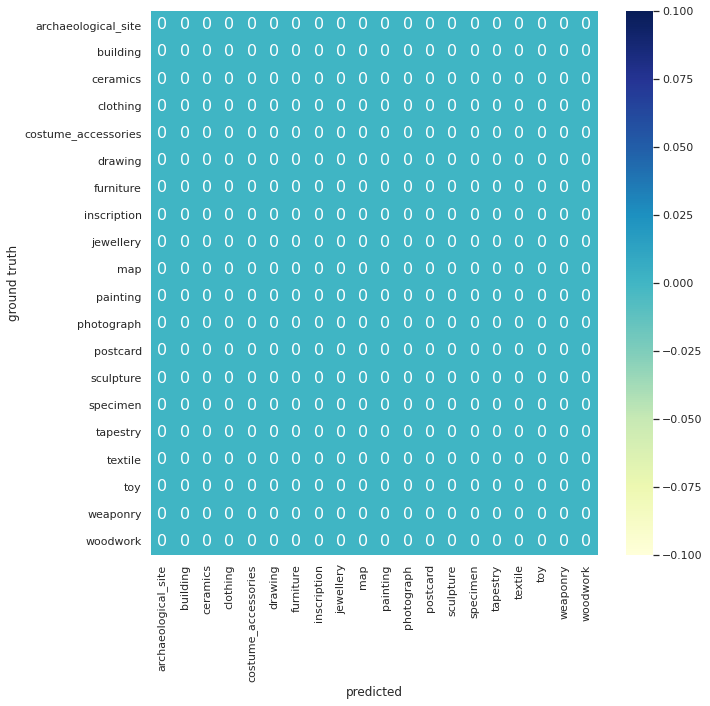

In [6]:
info_path = os.path.join(results_path,'split_0','training_info.pth')
training_info = torch.load(info_path)
confusion_matrix = training_info['confusion_matrix_test']
labels = [training_info['encoding_dict'][i] for i in range(confusion_matrix.shape[0])]
plot_conf_matrix(confusion_matrix,labels,font_scale=1)
    